# Phase 3 
### Core Functions

#### <span style="color:red; font-weight:bold">This ipynb file is to serve as production/test for the different sections of the algorithm/function module for the project in a step by step process before pushing to the final version</span>


In [1]:
# To check the current python path
import sys
print(sys.executable)

c:\Users\muham\AppData\Local\Programs\Python\Python310\python.exe


## All the modules needed

In [2]:
# Yahoo Finance API to pull the data
import yfinance as yf
# Pandas and Numpy for data maniupulation 
import pandas as pd
import numpy as np
# Matflotlib and Ploty for visualizations (Testing purposes)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.io as pio

# Check versions to avoid any compatibility issues
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("yfinance:", yf.__version__)


NumPy: 1.26.4
Pandas: 2.2.1
yfinance: 0.2.65


## Pulling Data from Data.py (vizualization and understanding)

In [3]:
# If you just edited data.py in the same session, set DO_RELOAD=True to re-import fresh.
DO_RELOAD = False

import os, sys
from importlib import import_module, reload

# 1) Import the correct module name (usually lowercase "data")
try:
    data = import_module("Data")     # <-- change to "Data" only if your file is literally Data.py
except ModuleNotFoundError:
    # If your notebook is in a subfolder (e.g., notebooks/), add repo root to path and retry
    sys.path.append(os.path.abspath(".."))
    data = import_module("data")

if DO_RELOAD:
    data = reload(data)

print("Loaded data module from:", data.__file__)

# 2) Grab all DataFrames built by data.py
long_df    = data.long_df
open_df    = data.open_df
high_df    = data.high_df
low_df     = data.low_df
close_df   = data.close_df
volume_df  = data.volume_df
outlier_df = data.outlier_df

# 3) Quick peek
display(long_df.head(8))

# 4) Confirm Sector presence:
print("\n[long_df] columns:", list(long_df.columns))
if "Sector" in long_df.columns:
    print("Sectors found in long_df:", sorted(long_df["Sector"].unique()))

def _show_col_levels(df, name):
    colnames = getattr(df.columns, "names", None)
    print(f"\n{name}: shape={df.shape} | column level names={colnames}")
    try:
        display(df.columns.to_frame(index=False).head(10))  # shows (Sector, Ticker) pairs if MultiIndex
    except Exception:
        pass
    display(df.head())

for nm, df in [("open_df", open_df), ("high_df", high_df), ("low_df", low_df),
               ("close_df", close_df), ("volume_df", volume_df), ("outlier_df", outlier_df)]:
    _show_col_levels(df, nm)


[*********************100%***********************]  15 of 15 completed


✅ Finished. Rows: 11280
Price        Date Ticker Sector        Open        High         Low  \
0      2022-09-19   AAPL   Tech  149.309998  154.559998  149.100006   
1      2022-09-20   AAPL   Tech  153.399994  158.080002  153.080002   
2      2022-09-21   AAPL   Tech  157.339996  158.740005  153.600006   
3      2022-09-22   AAPL   Tech  152.380005  154.470001  150.910004   
4      2022-09-23   AAPL   Tech  151.190002  151.470001  148.559998   

Price       Close       Volume  Return_Outlier  
0      154.479996   81474200.0           False  
1      156.899994  107689800.0           False  
2      153.720001  101696800.0           False  
3      152.740005   86652500.0           False  
4      150.429993   96029900.0           False  
Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  

Price        Date Ticker Sector        Open        High         Low  \
0      2022-09-19   AAPL   Tech  149.309998  154.559998  149.100006   
1      2022-09-20   AAPL   Tech  153.399994  158.080002  153.080002   
2      2022-09-21   AAPL   Tech  157.339996  158.740005  153.600006   
3      2022-09-22   AAPL   Tech  152.380005  154.470001  150.910004   
4      2022-09-23   AAPL   Tech  151.190002  151.470001  148.559998   
5      2022-09-26   AAPL   Tech  149.660004  153.770004  149.639999   
6      2022-09-27   AAPL   Tech  152.740005  154.720001  149.949997   
7      2022-09-28   AAPL   Tech  147.639999  150.639999  144.839996   

Price       Close       Volume  Return_Outlier  
0      154.479996   81474200.0           False  
1      156.899994  107689800.0           False  
2      153.720001  101696800.0           False  
3      152.740005   86652500.0           False  
4      150.429993   96029900.0           False  
5      150.770004   93339400.0           False  
6      151.759995   84442700.0           False  
7      149.839996  146691400.0           False


[long_df] columns: ['Date', 'Ticker', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return_Outlier']
Sectors found in long_df: ['Consumer Goods', 'Energy', 'Finance', 'Healthcare', 'Tech']

open_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  149.309998  242.470001  13.012  116.000000  33.720001  311.950012   
2022-09-20  153.399994  242.070007  13.215  117.410004  34.500000  311.160004   
2022-09-21  157.339996  244.270004  13.213  116.540001  34.310001  314.480011   
2022-09-22  152.380005  237.869995  13.070  113.379997  33.310001  302.950012   
2022-09-23  151.190002  239.539993  12.420  110.050003  31.930000  293.130005   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.300003  45.680000  143.639999     167.059998  254.000000   
2022-09-20  165.220001  45.000000  141.820007     167.580002  256.100006   
2022-09-21  165.020004  44.810001  142.149994     169.880005  255.130005   
2022-09-22  163.149994  43.669998  140.210007     168.399994  250.389999   
2022-09-23  165.740005  44.439999  142.070007     168.389999  247.210007   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  103.690002  91.010002  51.939999  152.929993  
2022-09-20  103.820000  92.730003  52.529999  156.039993  
2022-09-21  102.669998  93.570000  53.450001  158.309998  
2022-09-22   99.790001  92.199997  53.049999  157.600006  
2022-09-23   96.919998  87.500000  49.560001  149.750000


high_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  154.559998  245.139999  13.463  118.730003  34.869999  315.450012   
2022-09-20  158.080002  243.509995  13.483  117.690002  34.779999  314.369995   
2022-09-21  158.740005  247.660004  14.031  116.599998  34.400002  314.980011   
2022-09-22  154.470001  243.860001  13.149  113.599998  33.419998  303.079987   
2022-09-23  151.470001  241.130005  12.611  110.339996  32.090000  294.570007   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.429993  45.880001  143.860001     168.809998  257.549988   
2022-09-20  165.899994  45.270000  142.490005     169.149994  256.489990   
2022-09-21  166.800003  44.980000  143.630005     172.029999  256.910004   
2022-09-22  167.160004  45.000000  144.460007     169.889999  250.429993   
2022-09-23  167.479996  44.560001  143.419998     168.750000  249.100006   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  107.370003  93.489998  52.889999  156.949997  
2022-09-20  104.440002  92.930000  52.865002  156.850006  
2022-09-21  103.629997  93.879997  53.590000  158.779999  
2022-09-22  100.209999  92.660004  53.389999  158.279999  
2022-09-23   97.540001  87.500000  49.590000  150.179993


low_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  149.100006  240.850006  13.010  115.510002  33.630001  310.250000   
2022-09-20  153.080002  239.639999  13.057  114.639999  33.880001  309.440002   
2022-09-21  153.600006  238.899994  13.110  112.419998  33.119999  304.220001   
2022-09-22  150.910004  237.570007  12.428  111.070000  32.389999  296.589996   
2022-09-23  148.559998  235.199997  12.257  107.160004  31.209999  290.239990   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  164.080002  44.779999  141.429993     166.500000  253.350006   
2022-09-20  164.320007  44.439999  140.369995     166.860001  252.779999   
2022-09-21  163.240005  43.900002  140.289993     168.339996  251.080002   
2022-09-22  162.830002  43.520000  140.000000     168.050003  247.649994   
2022-09-23  164.660004  43.580002  140.949997     166.529999  244.190002   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  103.330002  91.000000  51.880001  152.800003  
2022-09-20  101.709999  91.639999  52.205002  154.339996  
2022-09-21   99.769997  90.870003  52.299999  154.949997  
2022-09-22   97.830002  90.519997  52.340000  154.740005  
2022-09-23   95.339996  84.849998  47.939999  143.660004


close_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector            Tech                         Finance                         \
Ticker            AAPL        MSFT    NVDA         JPM        BAC          MA   
Date                                                                            
2022-09-19  154.479996  244.520004  13.382  118.160004  34.689999  314.029999   
2022-09-20  156.899994  242.449997  13.176  115.830002  34.169998  313.269989   
2022-09-21  153.720001  238.949997  13.261  112.489998  33.150002  304.500000   
2022-09-22  152.740005  240.979996  12.561  111.209999  32.500000  298.359985   
2022-09-23  150.429993  237.919998  12.516  109.139999  31.730000  293.579987   

Sector      Healthcare                        Consumer Goods              \
Ticker             JNJ        PFE        ABBV            PEP         MCD   
Date                                                                       
2022-09-19  166.279999  45.439999  142.660004     168.729996  257.010010   
2022-09-20  164.970001  44.770000  141.770004     168.919998  255.399994   
2022-09-21  163.279999  43.919998  140.309998     168.440002  251.080002   
2022-09-22  166.179993  44.570000  143.009995     168.600006  247.940002   
2022-09-23  166.720001  44.080002  143.059998     168.520004  245.949997   

Sector                     Energy                         
Ticker             NKE        XOM       SHEL         CVX  
Date                                                      
2022-09-19  107.209999  93.199997  52.490002  156.899994  
2022-09-20  102.419998  92.440002  52.849998  156.279999  
2022-09-21   99.790001  90.949997  52.330002  155.009995  
2022-09-22   98.550003  90.570000  52.340000  154.889999  
2022-09-23   97.019997  85.750000  48.110001  144.770004


volume_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector             Tech                              Finance              \
Ticker             AAPL        MSFT         NVDA         JPM         BAC   
Date                                                                       
2022-09-19   81474200.0  26826900.0  569685000.0   8201300.0  29782000.0   
2022-09-20  107689800.0  26660300.0  524818000.0   9619000.0  33591100.0   
2022-09-21  101696800.0  28625600.0  807679000.0  12606300.0  51667800.0   
2022-09-22   86652500.0  31061200.0  759162000.0  11684500.0  47527500.0   
2022-09-23   96029900.0  34176000.0  663309000.0  18138600.0  55316100.0   

Sector                Healthcare                        Consumer Goods  \
Ticker             MA        JNJ         PFE       ABBV            PEP   
Date                                                                     
2022-09-19  2369700.0  7380900.0  16256200.0  5042500.0      3720900.0   
2022-09-20  2769600.0  7143400.0  15369000.0  4532900.0      3872000.0   
2022-09-21  2366300.0  8071200.0  17505200.0  5076100.0      5134500.0   
2022-09-22  3176500.0  7401100.0  18508100.0  6161000.0      4290600.0   
2022-09-23  3245900.0  9598600.0  18871700.0  5751600.0      4565100.0   

Sector                                 Energy                         
Ticker            MCD         NKE         XOM       SHEL         CVX  
Date                                                                  
2022-09-19  2195800.0   5162300.0  15342100.0  4662563.0   6813800.0  
2022-09-20  2140200.0  10006600.0  14712500.0  6354990.0   8955200.0  
2022-09-21  2438800.0   6279300.0  17332400.0  5108911.0   6877000.0  
2022-09-22  2300500.0   9638800.0  16139400.0  3480027.0   6981100.0  
2022-09-23  2672100.0   9026500.0  27738800.0  9922917.0  13919700.0


outlier_df: shape=(752, 15) | column level names=['Sector', 'Ticker']


Sector Ticker
0            Tech   AAPL
1            Tech   MSFT
2            Tech   NVDA
3         Finance    JPM
4         Finance    BAC
5         Finance     MA
6      Healthcare    JNJ
7      Healthcare    PFE
8      Healthcare   ABBV
9  Consumer Goods    PEP

Sector       Tech               Finance               Healthcare         \
Ticker       AAPL   MSFT   NVDA     JPM    BAC     MA        JNJ    PFE   
Date                                                                      
2022-09-19  False  False  False   False  False  False      False  False   
2022-09-20  False  False  False   False  False  False      False  False   
2022-09-21  False  False  False   False  False  False      False  False   
2022-09-22  False  False  False   False  False  False      False  False   
2022-09-23  False  False  False   False  False  False      False  False   

Sector            Consumer Goods               Energy                
Ticker       ABBV            PEP    MCD    NKE    XOM   SHEL    CVX  
Date                                                                 
2022-09-19  False          False  False  False  False  False  False  
2022-09-20  False          False  False  False  False  False  False  
2022-09-21  False          False  False  False  False  False  False  
2022-09-22  False          False  False  False  False  False  False  
2022-09-23  False          False  False  False   True   True   True

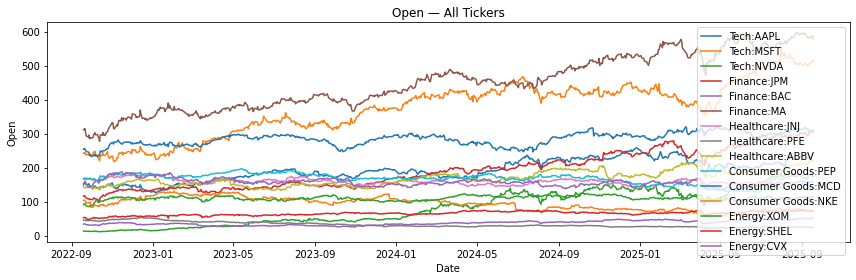

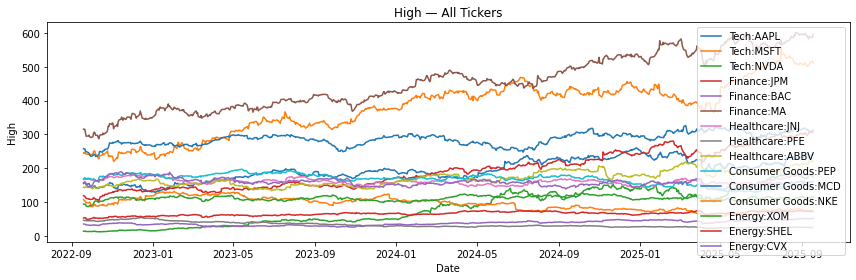

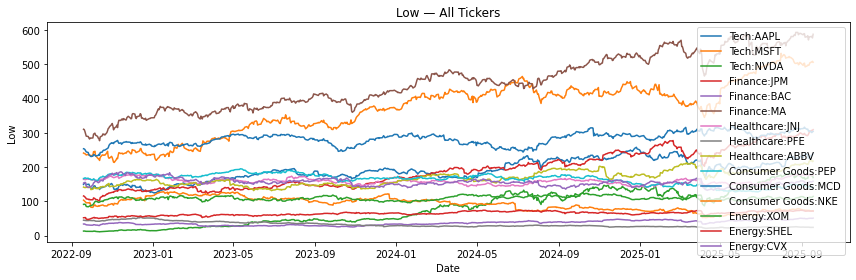

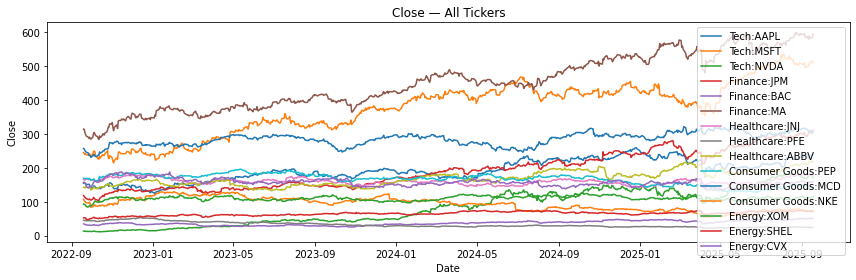

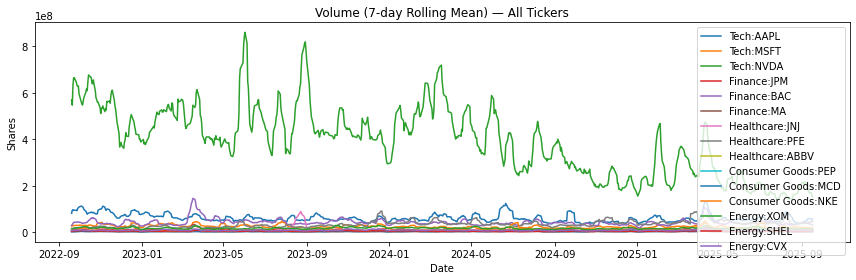

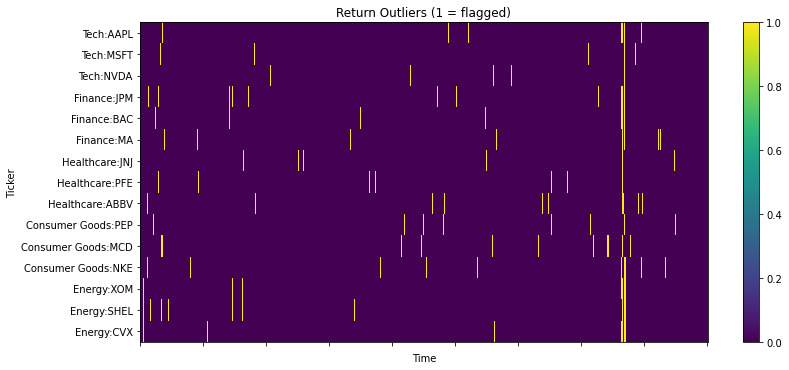

In [4]:
# Helper: flatten MultiIndex columns like ('Tech','AAPL') -> 'Tech:AAPL' for legible legends
def _flatten_cols(df):
    if isinstance(df.columns, pd.MultiIndex):
        df = df.copy()
        df.columns = [f"{lvl0}:{lvl1}" for lvl0, lvl1 in df.columns.to_list()]
    return df

# OPEN
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(open_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Open — All Tickers")
plt.xlabel("Date"); plt.ylabel("Open")
plt.tight_layout(); plt.show()

# HIGH
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(high_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("High — All Tickers")
plt.xlabel("Date"); plt.ylabel("High")
plt.tight_layout(); plt.show()

# LOW
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(low_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Low — All Tickers")
plt.xlabel("Date"); plt.ylabel("Low")
plt.tight_layout(); plt.show()

# CLOSE
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(close_df)
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Close — All Tickers")
plt.xlabel("Date"); plt.ylabel("Close")
plt.tight_layout(); plt.show()

# VOLUME (smoothed)
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(volume_df.rolling(7, min_periods=1).mean())
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Volume (7-day Rolling Mean) — All Tickers")
plt.xlabel("Date"); plt.ylabel("Shares")
plt.tight_layout(); plt.show()

# OUTLIERS heatmap with numbers (0/1), respecting Sector/Ticker labels
# Convert booleans → ints
out_int = outlier_df.astype(int)

# Build y-axis labels. If MultiIndex cols, use "Sector:Ticker"
if isinstance(out_int.columns, pd.MultiIndex):
    y_labels = [f"{s}:{t}" for s, t in out_int.columns.to_list()]
else:
    y_labels = list(out_int.columns)

Z = out_int.values.T  # (tickers x dates) for plotting
fig, ax = plt.subplots(figsize=(12, max(4, len(y_labels)*0.35)))
im = ax.imshow(Z, aspect="auto", interpolation="nearest")

# Colorbar and labels
ax.set_title("Return Outliers (1 = flagged)")
ax.set_xlabel("Time")
ax.set_ylabel("Ticker")
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# Optional: show fewer x ticks to avoid clutter
ax.set_xticks(np.linspace(0, Z.shape[1]-1, num=min(10, Z.shape[1]), dtype=int))
ax.set_xticklabels([""]*len(ax.get_xticks()))  # hide dates if too dense (keeps clean)

fig.colorbar(im)

# Annotate each cell with 0/1 (limit if very large to keep it fast)
max_cells_to_annotate = 2000  # tweak if needed
H, W = Z.shape
if H * W <= max_cells_to_annotate:
    for i in range(H):        # rows (tickers)
        for j in range(W):    # cols (time)
            ax.text(j, i, str(Z[i, j]), ha="center", va="center", fontsize=8, color="black")

plt.tight_layout(); plt.show()

## Feature Algoritms


#### Simple Moving Averages (SMA) Function

The SMA smooths out price data by averaging the last *N* closing prices.  
This helps to reduce noise and highlight the underlying trend.

- **SMA(5):** very short-term view, captures quick movements and short trends.  
- **SMA(20):** medium-term view, roughly one trading month, balances noise and trend.  
- **SMA(50):** longer-term view, often used to confirm sustained direction.  

Using multiple windows together allows comparison of short vs. medium vs. long-term momentum, which can reveal crossovers and shifts in trend direction.


- Rationale: Use SMA windows 5/20/50 as widely used lookbacks (5 = very short-term, 20 ≈ one trading month, 50 = medium-term trend).
- SMA = arithmetic mean of the last N closes → implemented via rolling(N).mean().
- Source (supports common periods and SMA definition): 
- https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

In [5]:
def add_smas(long_df: pd.DataFrame, windows=(5, 20, 50)) -> pd.DataFrame:
    # compute SMA columns per ticker to avoid window bleed across tickers
    out = []
    for tkr, g in long_df.groupby("Ticker", group_keys=False):
        # ensure chronological order for rolling operations
        g = g.sort_values("Date")
        # add one SMA column per requested window
        for w in windows:
            g[f"SMA_{w}"] = g["Close"].rolling(w).mean()
        out.append(g)
    # combine per-ticker results
    return pd.concat(out, ignore_index=True)

# apply to your tidy table
long_df_sma = add_smas(long_df, windows=(5, 20, 50))
display(long_df_sma.head(52))

Price        Date Ticker Sector        Open        High         Low  \
0      2022-09-19   AAPL   Tech  149.309998  154.559998  149.100006   
1      2022-09-20   AAPL   Tech  153.399994  158.080002  153.080002   
2      2022-09-21   AAPL   Tech  157.339996  158.740005  153.600006   
3      2022-09-22   AAPL   Tech  152.380005  154.470001  150.910004   
4      2022-09-23   AAPL   Tech  151.190002  151.470001  148.559998   
5      2022-09-26   AAPL   Tech  149.660004  153.770004  149.639999   
6      2022-09-27   AAPL   Tech  152.740005  154.720001  149.949997   
7      2022-09-28   AAPL   Tech  147.639999  150.639999  144.839996   
8      2022-09-29   AAPL   Tech  146.100006  146.720001  140.679993   
9      2022-09-30   AAPL   Tech  141.279999  143.100006  138.000000   
10     2022-10-03   AAPL   Tech  138.210007  143.070007  137.690002   
11     2022-10-04   AAPL   Tech  145.029999  146.220001  144.259995   
12     2022-10-05   AAPL   Tech  144.070007  147.380005  143.009995   
13     2022-10-06   AAPL   Tech  145.809998  147.539993  145.220001   
14     2022-10-07   AAPL   Tech  142.539993  143.100006  139.449997   
15     2022-10-10   AAPL   Tech  140.419998  141.889999  138.570007   
16     2022-10-11   AAPL   Tech  139.899994  141.350006  138.220001   
17     2022-10-12   AAPL   Tech  139.130005  140.360001  138.160004   
18     2022-10-13   AAPL   Tech  134.990005  143.589996  134.369995   
19     2022-10-14   AAPL   Tech  144.309998  144.520004  138.190002   
20     2022-10-17   AAPL   Tech  141.070007  142.899994  140.270004   
21     2022-10-18   AAPL   Tech  145.490005  146.699997  140.610001   
22     2022-10-19   AAPL   Tech  141.690002  144.949997  141.500000   
23     2022-10-20   AAPL   Tech  143.020004  145.889999  142.649994   
24     2022-10-21   AAPL   Tech  142.869995  147.850006  142.649994   
25     2022-10-24   AAPL   Tech  147.190002  150.229996  146.000000   
26     2022-10-25   AAPL   Tech  150.089996  152.490005  149.360001   
27     2022-10-26   AAPL   Tech  150.960007  151.990005  148.039993   
28     2022-10-27   AAPL   Tech  148.070007  149.050003  144.130005   
29     2022-10-28   AAPL   Tech  148.199997  157.500000  147.820007   
30     2022-10-31   AAPL   Tech  153.160004  154.240005  151.919998   
31     2022-11-01   AAPL   Tech  155.080002  155.449997  149.130005   
32     2022-11-02   AAPL   Tech  148.949997  152.169998  145.000000   
33     2022-11-03   AAPL   Tech  142.059998  142.800003  138.750000   
34     2022-11-04   AAPL   Tech  142.089996  142.669998  134.380005   
35     2022-11-07   AAPL   Tech  137.110001  139.149994  135.669998   
36     2022-11-08   AAPL   Tech  140.410004  141.429993  137.490005   
37     2022-11-09   AAPL   Tech  138.500000  138.550003  134.589996   
38     2022-11-10   AAPL   Tech  141.240005  146.869995  139.500000   
39     2022-11-11   AAPL   Tech  145.820007  150.009995  144.369995   
40     2022-11-14   AAPL   Tech  148.970001  150.279999  147.429993   
41     2022-11-15   AAPL   Tech  152.220001  153.589996  148.559998   
42     2022-11-16   AAPL   Tech  149.130005  149.869995  147.289993   
43     2022-11-17   AAPL   Tech  146.429993  151.479996  146.149994   
44     2022-11-18   AAPL   Tech  152.309998  152.699997  149.970001   
45     2022-11-21   AAPL   Tech  150.160004  150.369995  147.720001   
46     2022-11-22   AAPL   Tech  148.130005  150.419998  146.929993   
47     2022-11-23   AAPL   Tech  149.449997  151.830002  149.339996   
48     2022-11-25   AAPL   Tech  148.309998  148.880005  147.119995   
49     2022-11-28   AAPL   Tech  145.139999  146.639999  143.380005   
50     2022-11-29   AAPL   Tech  144.289993  144.809998  140.350006   
51     2022-11-30   AAPL   Tech  141.399994  148.720001  140.550003   

Price       Close       Volume  Return_Outlier       SMA_5      SMA_20  \
0      154.479996   81474200.0           False         NaN         NaN   
1      156.899994  107689800.0           False         NaN         NaN   
2      153.720

In [6]:
def sma_wide_sorted(long_df_sma: pd.DataFrame, window: int) -> pd.DataFrame:
    # pivot to Date x Ticker for the requested SMA
    wide = long_df_sma.pivot(index="Date", columns="Ticker", values=f"SMA_{window}").sort_index()
    # forward fill to get the most recent available value per column
    latest = wide.ffill().iloc[-1]
    # reorder columns by ascending latest SMA value
    wide = wide.loc[:, latest.sort_values().index]
    return wide

# sanity check
_ = sma_wide_sorted(long_df_sma, 5).head()

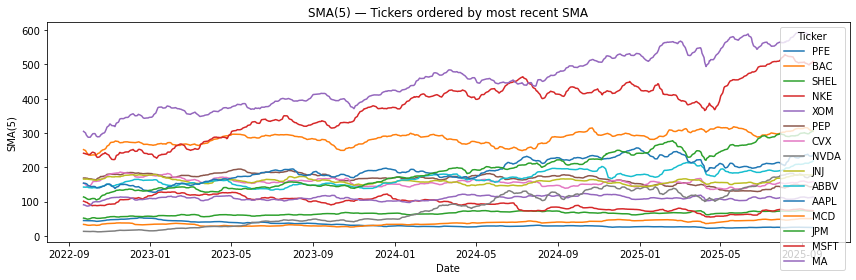

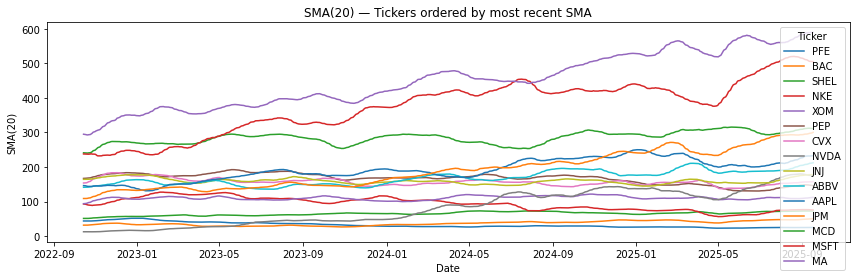

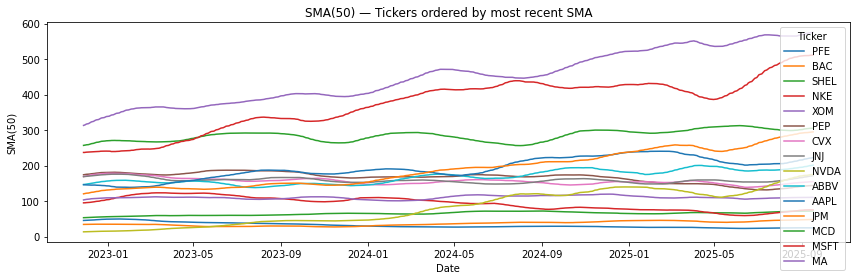

In [7]:
# SMA 5
plt.figure(figsize=(12, 4))
sma5 = sma_wide_sorted(long_df_sma, 5)
sma5.plot(ax=plt.gca(), legend=True)
plt.title("SMA(5) — Tickers ordered by most recent SMA"); plt.xlabel("Date"); plt.ylabel("SMA(5)")
plt.tight_layout(); plt.show()

# SMA 20
plt.figure(figsize=(12, 4))
sma20 = sma_wide_sorted(long_df_sma, 20)
sma20.plot(ax=plt.gca(), legend=True)
plt.title("SMA(20) — Tickers ordered by most recent SMA"); plt.xlabel("Date"); plt.ylabel("SMA(20)")
plt.tight_layout(); plt.show()

# SMA 50
plt.figure(figsize=(12, 4))
sma50 = sma_wide_sorted(long_df_sma, 50)
sma50.plot(ax=plt.gca(), legend=True)
plt.title("SMA(50) — Tickers ordered by most recent SMA"); plt.xlabel("Date"); plt.ylabel("SMA(50)")
plt.tight_layout(); plt.show()


#### Upward and Downward Runs

Trend runs measure how many days in a row a stock keeps moving in the same direction.  
- **Up run:** consecutive days with rising closes.  
- **Down run:** consecutive days with falling closes.  
- **Flat day:** no change, treated as neutral.  

From these runs we track:  
- total counts of up and down runs,  
- the **longest streaks** in each direction.  

This highlights persistence of trends and shows which tickers sustain momentum versus which reverse quickly.

- Trend runs rationale:
- Up run = consecutive days with Close_t > Close_{t-1}; Down run = consecutive days with Close_t < Close_{t-1}.
- Flat (Close_t == Close_{t-1}) is treated as neutral and *omits/breaks* runs — it neither lengthens a run nor counts as a run.
- This follows runs-test practice of forming a dichotomous (+/−) sequence and omitting ties.
- Plotting convention: up segments green, down segments red (standard candlestick colouring).
- Sources:
  - Runs definition & handling ties: https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test
  - Candlestick colours (green up, red down): https://www.investopedia.com/ask/answers/07/candlestickcolor.asp

In [ ]:
def compute_trend_runs(long_df: pd.DataFrame) -> pd.DataFrame:
    # create a daily change direction column: 1 = up, -1 = down, 0 = flat
    long_df = long_df.copy()
    long_df["Change"] = long_df.groupby("Ticker")["Close"].diff()
    long_df["Direction"] = long_df["Change"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    results = []

    # process each ticker separately
    for ticker, g in long_df.groupby("Ticker"):
        runs = []
        current_dir = 0
        run_len = 0

        for d in g["Direction"]:
            if d == current_dir and d != 0:
                run_len += 1
            else:
                if current_dir != 0:
                    runs.append((current_dir, run_len))
                current_dir = d
                run_len = 1 if d != 0 else 0
        if current_dir != 0:
            runs.append((current_dir, run_len))

        up_runs = [r[1] for r in runs if r[0] == 1]
        down_runs = [r[1] for r in runs if r[0] == -1]

        results.append({
            "Ticker": ticker,
            "Total Up Runs": len(up_runs),
            "Longest Up Run": max(up_runs) if up_runs else 0,
            "Total Down Runs": len(down_runs),
            "Longest Down Run": max(down_runs) if down_runs else 0
        })

    return pd.DataFrame(results)

# example usage
trend_summary = compute_trend_runs(long_df)
display(trend_summary)

Ticker  Total Up Runs  Longest Up Run  Total Down Runs  Longest Down Run
0    AAPL            182               8              181                 8
1    ABBV            181              12              181                 8
2     BAC            169               8              168                 8
3     CVX            176               9              176                 8
4     JNJ            169               9              170                10
5     JPM            182              10              181                 6
6      MA            190               8              190                 8
7     MCD            176               9              176                 7
8    MSFT            190               9              190                 6
9     NKE            192              12              192                11
10   NVDA            186              10              187                 5
11    PEP            192               7              191                10
12    PFE            191               6              188                 8
13   SHEL            186              10              184                 6
14    XOM            176               8              175                10

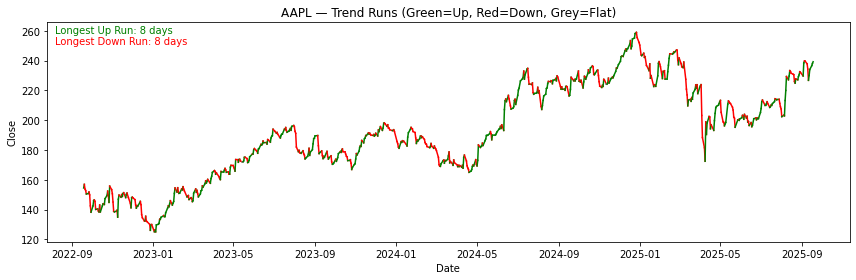

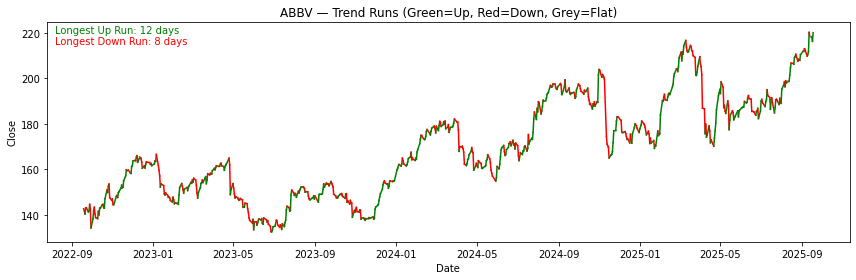

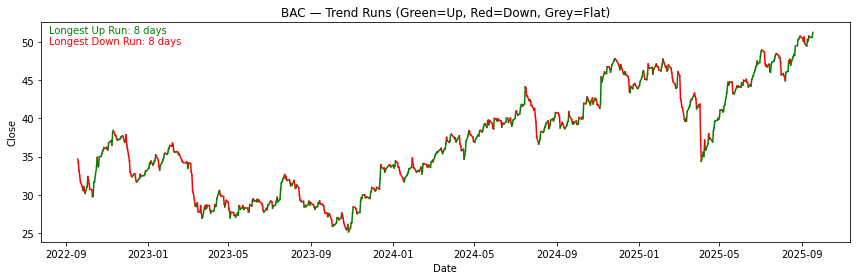

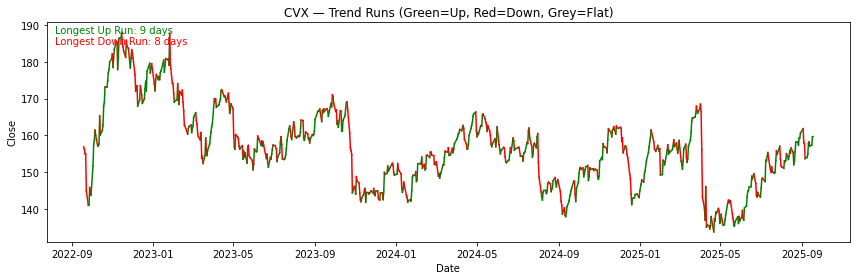

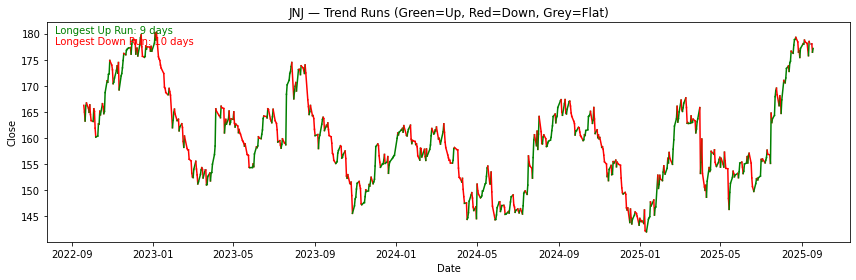

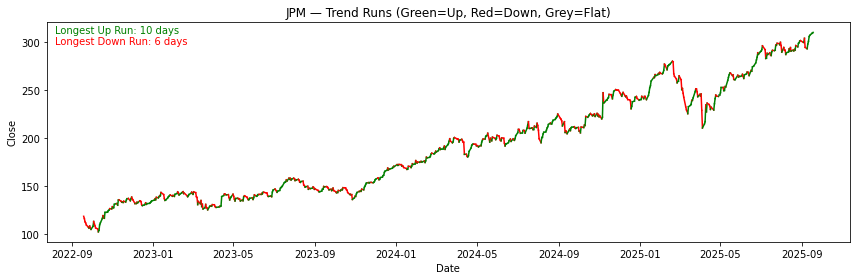

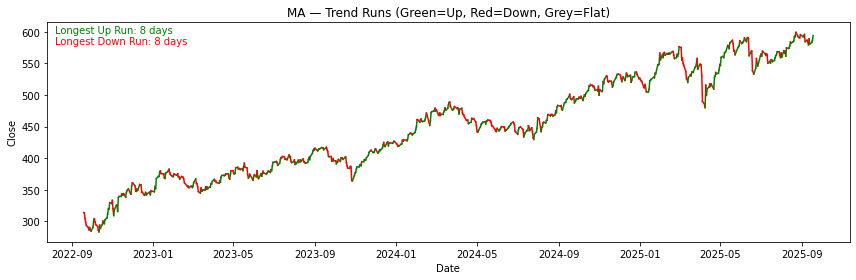

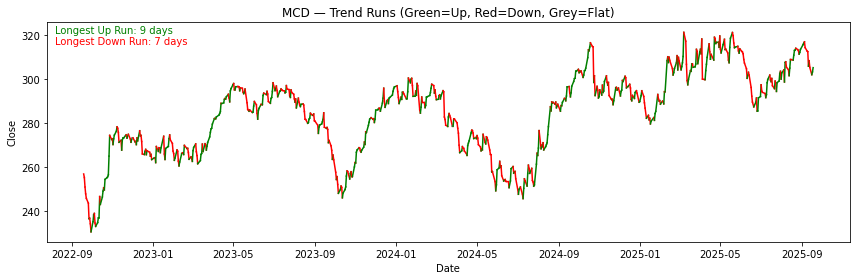

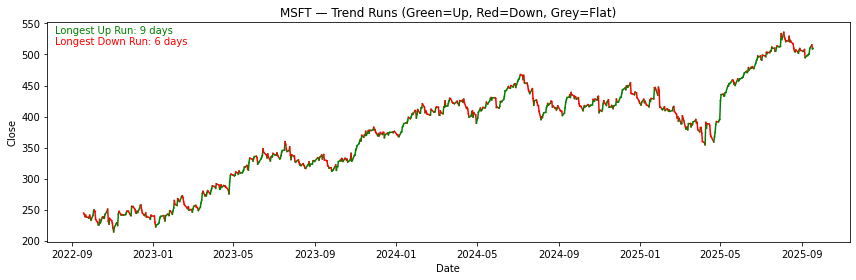

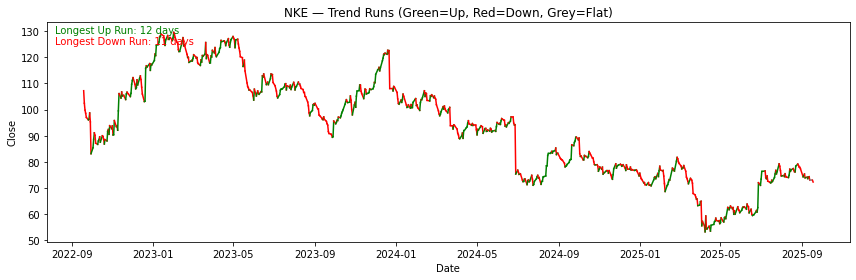

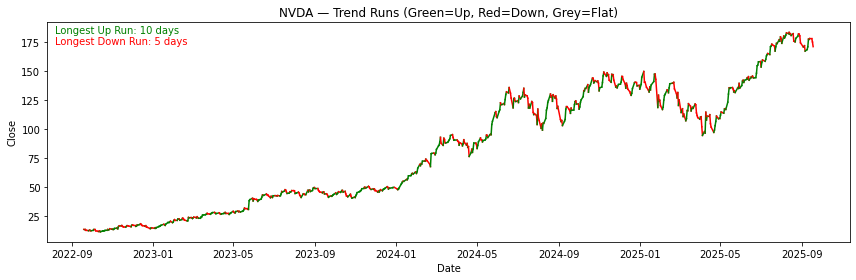

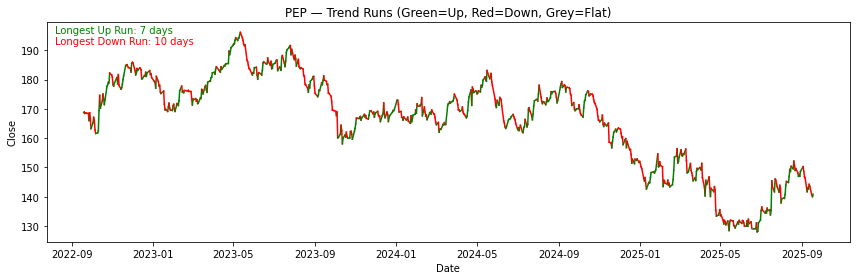

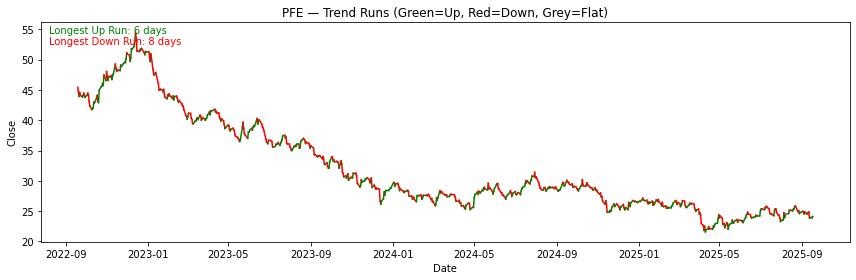

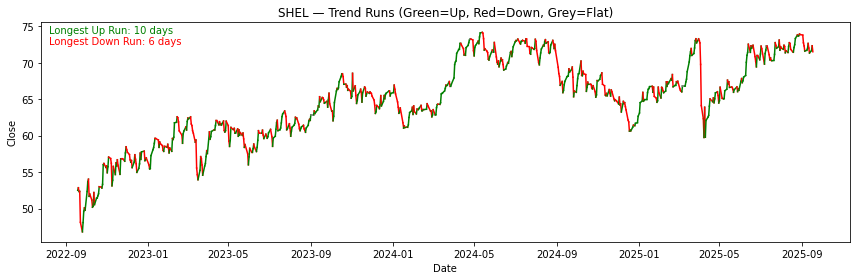

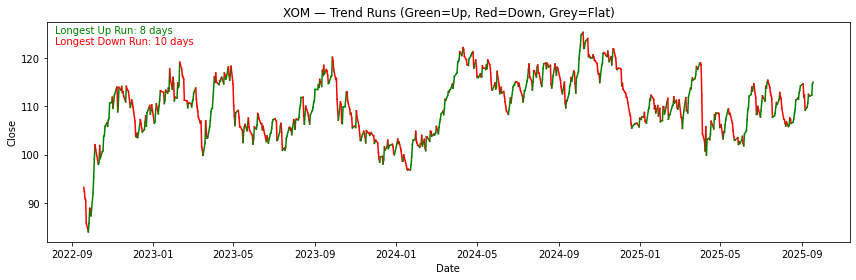

In [9]:
def plot_trend_runs(long_df: pd.DataFrame, summary_df: pd.DataFrame):
    for ticker, g in long_df.groupby("Ticker"):
        g = g.sort_values("Date").copy()
        g["Change"] = g["Close"].diff()
        g["Direction"] = g["Change"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

        # split into segments for coloring
        dates = g["Date"].values
        closes = g["Close"].values
        dirs = g["Direction"].values

        plt.figure(figsize=(12,4))
        for i in range(1, len(dates)):
            color = "green" if dirs[i] > 0 else ("red" if dirs[i] < 0 else "grey")
            plt.plot(dates[i-1:i+1], closes[i-1:i+1], color=color)

        plt.title(f"{ticker} — Trend Runs (Green=Up, Red=Down, Grey=Flat)")
        plt.xlabel("Date"); plt.ylabel("Close")

        # overlay longest up/down run annotations
        row = summary_df[summary_df["Ticker"] == ticker].iloc[0]
        plt.text(0.01, 0.95,
                 f"Longest Up Run: {row['Longest Up Run']} days",
                 transform=plt.gca().transAxes, color="green")
        plt.text(0.01, 0.90,
                 f"Longest Down Run: {row['Longest Down Run']} days",
                 transform=plt.gca().transAxes, color="red")

        plt.tight_layout()
        plt.show()

# example usage
plot_trend_runs(long_df, trend_summary)


#### Daily Returns

Daily returns measure the percentage change in closing price from one day to the next:

- Positive value → stock went up  
- Negative value → stock went down  
- Zero → no change  

This normalizes price changes across tickers and is used for analyzing volatility and short-term performance.

- Daily returns rationale:
- r_t = (P_t - P_{t-1}) / P_{t-1} = P_t / P_{t-1} - 1
- pandas Series.pct_change() computes (current - prior) / prior by default (periods=1),
- so groupby("Ticker")["Close"].pct_change() implements the same formula (first row per ticker is NaN by design).
- Multiply by 100 if you want percentage points instead of a fraction.
 Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

In [10]:
def add_daily_returns(long_df: pd.DataFrame) -> pd.DataFrame:
    # add daily returns per ticker
    df = long_df.sort_values(["Ticker", "Date"]).copy()
    df["Daily_Return"] = df.groupby("Ticker")["Close"].pct_change()
    return df

# call function, store result in long_df_returns
long_df_returns = add_daily_returns(long_df)

# quick peek
display(long_df_returns[["Date", "Ticker", "Close", "Daily_Return"]].head())

Price        Date Ticker       Close  Daily_Return
0      2022-09-19   AAPL  154.479996           NaN
1      2022-09-20   AAPL  156.899994      0.015665
2      2022-09-21   AAPL  153.720001     -0.020268
3      2022-09-22   AAPL  152.740005     -0.006375
4      2022-09-23   AAPL  150.429993     -0.015124

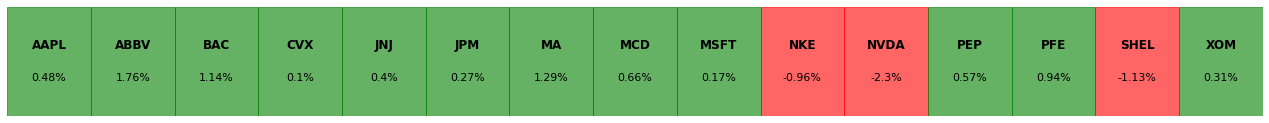

In [11]:
def latest_daily_returns_boxes(long_df):
    # sort so latest per ticker is correct
    g = long_df.sort_values(["Ticker", "Date"]).copy()
    g["Daily_Return"] = g.groupby("Ticker")["Close"].pct_change()

    # pick latest available row per ticker
    latest = g.groupby("Ticker").tail(1).copy()
    latest["Daily_Return"] = latest["Daily_Return"].fillna(0)  # handle tickers with only 1 row
    latest["PctText"] = (latest["Daily_Return"]*100).round(2).astype(str) + "%"

    # set up plot
    fig, ax = plt.subplots(figsize=(1.5*len(latest), 2))
    ax.axis("off")

    # draw one box per ticker
    for i, row in enumerate(latest.itertuples()):
        val = row.Daily_Return
        text = row.PctText
        ticker = row.Ticker

        # choose color
        if val > 0:
            color = "green"
        elif val < 0:
            color = "red"
        else:
            color = "grey"

        # draw rectangle
        ax.add_patch(Rectangle((i, 0), 1, 1, color=color, alpha=0.6))

        # write ticker and value in the middle
        ax.text(i+0.5, 0.65, ticker,
                ha="center", va="center", fontsize=12, fontweight="bold", color="black")
        ax.text(i+0.5, 0.35, text,
                ha="center", va="center", fontsize=11, color="black")

    # adjust limits
    ax.set_xlim(0, len(latest))
    ax.set_ylim(0, 1)

    plt.show()

# run it
latest_daily_returns_boxes(long_df)

### Max Profit Calculation

Implements the classic stock trading problem: **Best Time to Buy and Sell Stock II**  
https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/

- Assumes multiple buy/sell transactions are allowed.  
- Profit is maximized by summing all **upward price moves** (buy before a rise, sell at the peak).  
- Ignores transaction costs and assumes instant trades at daily closes.  

This gives the theoretical maximum profit achievable over the period if one could trade optimally.


- With unlimited transactions (but only one position at a time and sell after buy),
- the optimal hindsight profit equals the sum of all positive day-to-day price increases.
- This is a theoretical maximum over the history (not a trading signal).
- Source (explains problem constraints and the “accumulate positive differences” solution):
- https://www.geeksforgeeks.org/dsa/stock-buy-sell/

In [12]:
def extract_trades_for_ticker(long_df: pd.DataFrame, ticker: str):
    """
    Return a list of trades for a single ticker using
    the 'sum of rises' (Best Time II) rule.
    """
    g = (long_df[long_df["Ticker"] == ticker]
         .sort_values("Date")[["Date","Close"]].reset_index(drop=True))

    trades = []
    holding = False
    buy_date = buy_price = None

    for i in range(1, len(g)):
        prev_p, cur_p = g.loc[i-1, "Close"], g.loc[i, "Close"]
        prev_d, cur_d = g.loc[i-1, "Date"],  g.loc[i, "Date"]

        if not holding and cur_p > prev_p:
            holding = True
            buy_date, buy_price = prev_d, prev_p

        is_last = (i == len(g) - 1)
        next_drop_or_end = (cur_p > prev_p and (is_last or g.loc[i+1, "Close"] < cur_p))
        if holding and next_drop_or_end:
            sell_date, sell_price = cur_d, cur_p
            trades.append({
                "buy_date": buy_date, "buy_price": buy_price,
                "sell_date": sell_date, "sell_price": sell_price,
                "profit": sell_price - buy_price
            })
            holding = False

    return trades


def trades_df_for_ticker(long_df, ticker: str) -> pd.DataFrame:
    """Convert trades for one ticker into a DataFrame."""
    return pd.DataFrame(extract_trades_for_ticker(long_df, ticker))


def trades_df_for_all(long_df) -> pd.DataFrame:
    """Collect all trades for all tickers into one DataFrame."""
    rows = []
    for tkr in long_df["Ticker"].unique():
        for t in extract_trades_for_ticker(long_df, tkr):
            t["Ticker"] = tkr
            rows.append(t)
    return pd.DataFrame(rows).sort_values(["Ticker", "buy_date"]).reset_index(drop=True)


def max_profit_summary(long_df) -> pd.DataFrame:
    """Compute max profit (sum of rises) per ticker."""
    out = []
    for tkr in long_df["Ticker"].unique():
        profit = sum(t["profit"] for t in extract_trades_for_ticker(long_df, tkr))
        out.append({"Ticker": tkr, "Max_Profit": profit})
    return pd.DataFrame(out).sort_values("Max_Profit", ascending=False)


In [13]:
# all trades for AAPL
display(trades_df_for_ticker(long_df, "AAPL"))

# trades for all tickers
display(trades_df_for_all(long_df).head())

# per-ticker profit summary
display(max_profit_summary(long_df))


buy_date   buy_price   sell_date  sell_price     profit
0    2022-09-19  154.479996  2022-09-20  156.899994   2.419998
1    2022-09-23  150.429993  2022-09-27  151.759995   1.330002
2    2022-09-30  138.199997  2022-10-05  146.399994   8.199997
3    2022-10-07  140.089996  2022-10-10  140.419998   0.330002
4    2022-10-12  138.339996  2022-10-13  142.990005   4.650009
..          ...         ...         ...         ...        ...
177  2025-08-11  227.179993  2025-08-13  233.330002   6.150009
178  2025-08-21  224.899994  2025-08-22  227.759995   2.860001
179  2025-08-25  227.160004  2025-08-28  232.559998   5.399994
180  2025-09-02  229.720001  2025-09-04  239.779999  10.059998
181  2025-09-10  226.789993  2025-09-17  239.291199  12.501205

[182 rows x 5 columns]

buy_date   buy_price   sell_date  sell_price    profit Ticker
0  2022-09-19  154.479996  2022-09-20  156.899994  2.419998   AAPL
1  2022-09-23  150.429993  2022-09-27  151.759995  1.330002   AAPL
2  2022-09-30  138.199997  2022-10-05  146.399994  8.199997   AAPL
3  2022-10-07  140.089996  2022-10-10  140.419998  0.330002   AAPL
4  2022-10-12  138.339996  2022-10-13  142.990005  4.650009   AAPL

Ticker   Max_Profit
8    MSFT  1651.689987
6      MA  1634.850311
0    AAPL   893.541191
7     MCD   866.457687
5     JPM   834.940002
10   NVDA   784.839074
1    ABBV   684.700165
3     CVX   639.965088
11    PEP   499.850067
14    XOM   481.094933
9     NKE   466.640076
4     JNJ   458.444870
13   SHEL   247.580002
2     BAC   166.470003
12    PFE   124.124300

In [ ]:
def plot_trades_interactive(long_df: pd.DataFrame, ticker: str):
    g = (long_df[long_df["Ticker"] == ticker]
         .sort_values("Date")[["Date", "Close"]])

    trades = extract_trades_for_ticker(long_df, ticker)
    total_profit = sum(t["profit"] for t in trades)

    fig = go.Figure()

    # Base price line
    fig.add_trace(go.Scatter(
        x=g["Date"], y=g["Close"],
        mode="lines", name=f"{ticker} Close",
        line=dict(width=1.2, color="blue"),
        opacity=0.6
    ))

    # Trade segments and markers
    for t in trades:
        seg_mask = (g["Date"] >= t["buy_date"]) & (g["Date"] <= t["sell_date"])
        seg_dates = g.loc[seg_mask, "Date"]
        seg_prices = g.loc[seg_mask, "Close"]

        # Trade segment
        fig.add_trace(go.Scatter(
            x=seg_dates, y=seg_prices,
            mode="lines", name="Profitable Trade",
            line=dict(width=2.5, color="green")
        ))

        # Buy marker
        fig.add_trace(go.Scatter(
            x=[t["buy_date"]], y=[t["buy_price"]],
            mode="markers", name="Buy",
            marker=dict(symbol="triangle-up", color="green", size=10)
        ))

        # Sell marker
        fig.add_trace(go.Scatter(
            x=[t["sell_date"]], y=[t["sell_price"]],
            mode="markers", name="Sell",
            marker=dict(symbol="triangle-down", color="red", size=10)
        ))

        # Profit annotation
        fig.add_annotation(
            x=t["sell_date"], y=t["sell_price"],
            text=f"+{t['profit']:.2f}",
            showarrow=False, font=dict(color="green", size=10),
            xanchor="left", yanchor="bottom"
        )

    fig.update_layout(
    showlegend=False,  # Removes the legend
    title=None,        # Removes the title
    margin=dict(t=20), # Shrinks top margin
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified",
    template="plotly_white",
    height=500
)

    fig.show()

pio.renderers.default = 'notebook'  # or 'inline' or 'vscode' depending on your IDE
# interactive graph to see buy/sell
plot_trades_interactive(long_df, "AAPL") #change the ticker accordingly
